<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graph Fundamentals
A graph G(V,E) is a set of vertices (nodes) V connected by edges E. In social network analysis,

Vertices represent objects. Edges represent relationships or associations. Edges can be directed (one-way) or undirected (two-way). Edges can also have weights representing the strength of the connection.

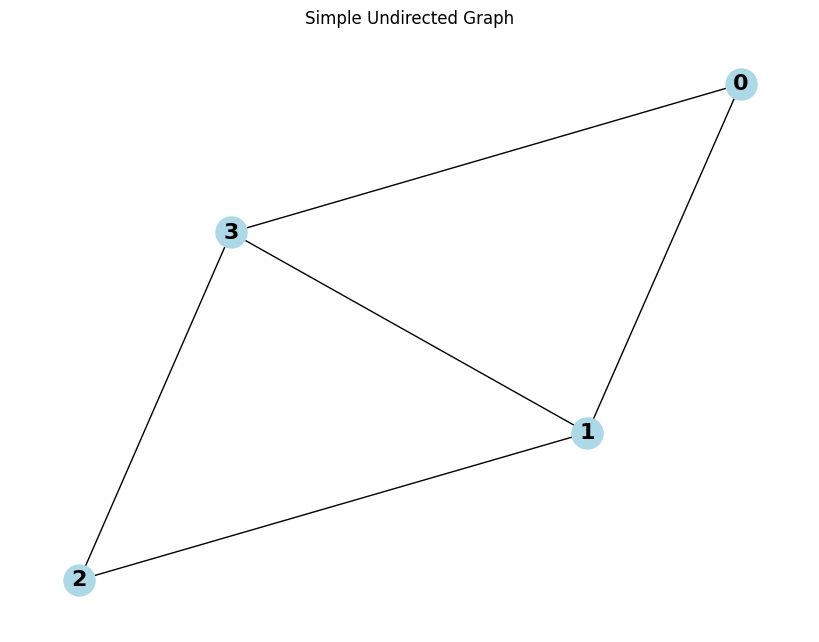

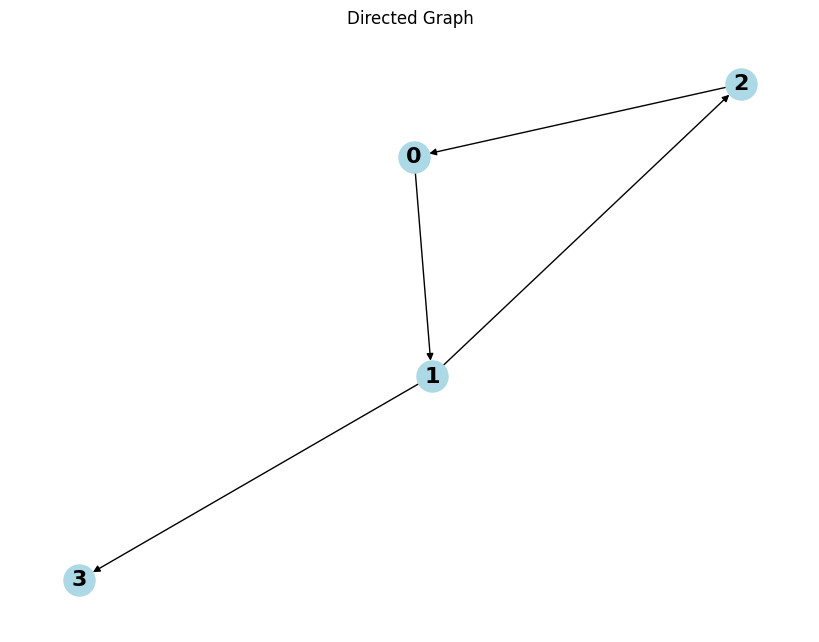

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#graph plot
def plot_graph(G, title="Graph Visualization"):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=500, font_size=16, font_weight='bold')
    plt.title(title)
    plt.show()

#simple undirected graph
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,3), (3,0), (1,3)])
plot_graph(G, "Simple Undirected Graph")

#directed graph
D = nx.DiGraph()
D.add_edges_from([(0,1), (1,2), (2,0), (1,3)])
plot_graph(D, "Directed Graph")

## Matrix Representations
Graphs can be represented using matrices:

* Adjacency Matrix (M): Shows direct connections between nodes
* Degree Matrix (D): Diagonal matrix showing number of connections per node
* Laplacian Matrix (L): L = D - M, fundamental for spectral analysis

In [ ]:

#adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)

#calculate degree matrix
degrees = np.diag([G.degree(i) for i in G.nodes()])
print("\nDegree Matrix:")
print(degrees)

#laplacian matrix
L = nx.laplacian_matrix(G).toarray()
print("\nLaplacian Matrix:")
print(L)

#L = D - A
print("\nVerifying L = D - A:")
print("Difference between L and (D-A):")
print(np.abs(L - (degrees - A)))



Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]

Degree Matrix:
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]

Laplacian Matrix:
[[ 2 -1  0 -1]
 [-1  3 -1 -1]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]

Verifying L = D - A:
Difference between L and (D-A):
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Advanced Graph Properties
### Laplacian Matrix Properties
Key properties of the Laplacian matrix

1. Symmetric positive semi-definite
2. Smallest eigenvalue is 0 with eigenvector of all ones
3. Number of connected components equals number of zero eigenvalues
4. Critical for spectral clustering and graph partitioning

In [ ]:
#create a test graph
G_test = nx.Graph()
G_test.add_edges_from([(0,1), (1,2), (2,3), (3,0)])

L = nx.laplacian_matrix(G_test).toarray()

#symmetric
print("Is Laplacian symmetric?", np.allclose(L, L.T))

#positive semi-definite (all eigenvalues ≥ 0)
eigenvals = np.linalg.eigvalsh(L)
print("\nEigenvalues:", eigenvals)
print("All eigenvalues non-negative?", all(eigenvals > -1e-10))

#smallest eigenvalue is 0
print("Smallest eigenvalue ≈ 0?", abs(min(eigenvals)) < 1e-10)

#Le = 0 (e = vector of ones)
ones = np.ones(len(G_test))
print("\nL·1 ≈ 0?", np.allclose(L @ ones, 0))

Is Laplacian symmetric? True

Eigenvalues: [-8.58688121e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]
All eigenvalues non-negative? True
Smallest eigenvalue ≈ 0? True

L·1 ≈ 0? True


## Spectral Graph Partitioning
### Graph Cuts and Partitioning
Spectral partitioning uses eigenvectors of the Laplacian to divide graphs into communities:

* Minimizes the number of edges between partitions
* Uses Fiedler vector (second eigenvector of L)
* Can implement both ratio cut and normalized cut

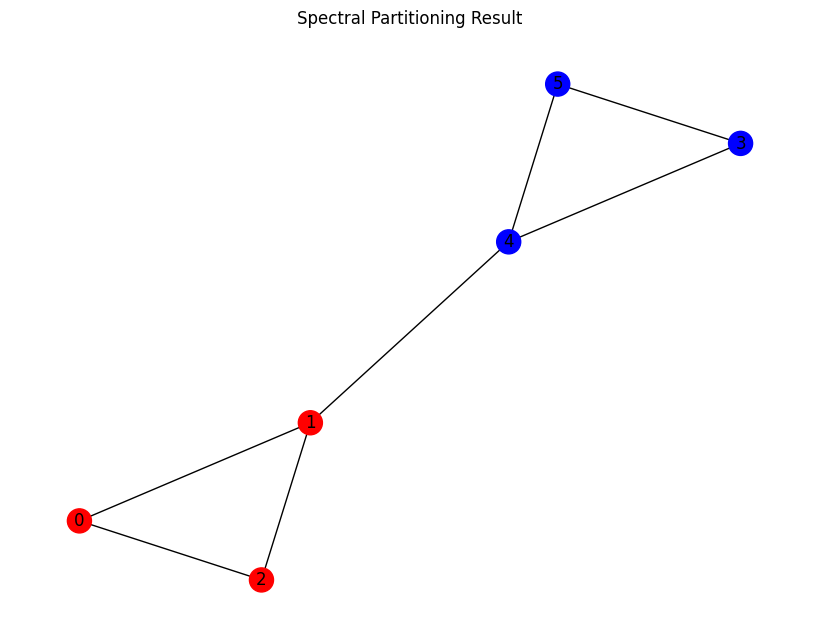

Partition 1: [0, 1, 2]
Partition 2: [3, 4, 5]


In [ ]:
#create example graph with clear communities
G_community = nx.Graph()
edges = [(0,1), (1,2), (2,0),  # First community
         (3,4), (4,5), (5,3),  # Second community
         (1,4)]               # Bridge edge
G_community.add_edges_from(edges)


#calculate normalized laplacian
L = nx.normalized_laplacian_matrix(G_community).toarray()

#get Fiedler vector
eigenvals, eigenvecs = np.linalg.eigh(L)
fiedler_vector = eigenvecs[:, 1]

# partition based on fiedler vector sign
p1 = [i for i, v in enumerate(fiedler_vector) if v < 0]
p2 = [i for i, v in enumerate(fiedler_vector) if v >= 0]

#visualize partitioned graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_community)
colors = ['red' if i in p1 else 'blue' for i in range(G_community.number_of_nodes())]
nx.draw(G_community, pos, node_color=colors, with_labels=True)
plt.title("Spectral Partitioning Result")
plt.show()

print("Partition 1:", p1)
print("Partition 2:", p2)

## Cut Quality Metrics
We can evaluate partition quality using different metrics:

* Ratio Cut: Balances partition sizes
* Normalized Cut: Considers edge weights and node degrees

In [ ]:

#calculate cut size
cut_value = sum(1 for i in p1 for j in p2 if G_community.has_edge(i,j))

#ratio cut
ratio_cut = cut_value/len(p1) + cut_value/len(p2)

#normalized cut
vol1 = sum(dict(G_community.degree()).get(i) for i in p1)
vol2 = sum(dict(G_community.degree()).get(i) for i in p2)
normalized_cut = cut_value/vol1 + cut_value/vol2

print(f"Cut value: {cut_value}")
print(f"Ratio Cut: {ratio_cut:.3f}")
print(f"Normalized Cut: {normalized_cut:.3f}")

Cut value: 1
Ratio Cut: 0.667
Normalized Cut: 0.286
